In [1]:
# !pip install interpret
# !pip install --user xgboost
# !pip install pytorch-tabnet
# !pip install anchor-exp

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from interpret import preserve, show
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

random_state=42

In [3]:
dataset_folder = 'dataset/ESDRPD/'

file = 'Dataset 2 _ Early-stage diabetes risk prediction dataset (ESDRPD).xlsx'
class_names = [0, 1]
_class = 'Class'

In [4]:
df = pd.read_excel(open(dataset_folder + file, 'rb'), sheet_name='Dataset 2 – Early-stage diabete')
 
df.replace(('Yes', 'No'), (1, 0), inplace=True)
df.replace(('Positive', 'Negative'), (1, 0), inplace=True)
df.replace(('Male', 'Female'), (1, 0), inplace=True)
df.head()

Age  Gender  Polyuria  Polydipsia  Sudden weight loss  Weakness  \
0   40       1         0           1                   0         1   
1   58       1         0           0                   0         1   
2   41       1         1           0                   0         1   
3   45       1         0           0                   1         1   
4   60       1         1           1                   1         1   

   Polyphagia  Genital thrush  Visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   Delayed healing  Partial paresis  Muscle stiffness  Alopecia  Obesity  \
0                1                0                 1         1        1   
1                0                1                 0         1        0   
2                1                0                 1         1        0   
3                1                0                 0         0        0   
4                1                1                 1         1        1   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   Sudden weight loss  520 non-null    int64
 5   Weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   Visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  Delayed healing     520 non-null    int64
 12  Partial paresis     520 non-null    int64
 13  Muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  Class               520 non-null    int64
dt

In [6]:
X, y = df.drop(columns=[_class]), df[_class]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=random_state)

In [8]:
x_test.shape

(416, 16)

In [9]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 207 to 102
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 104 non-null    int64
 1   Gender              104 non-null    int64
 2   Polyuria            104 non-null    int64
 3   Polydipsia          104 non-null    int64
 4   Sudden weight loss  104 non-null    int64
 5   Weakness            104 non-null    int64
 6   Polyphagia          104 non-null    int64
 7   Genital thrush      104 non-null    int64
 8   Visual blurring     104 non-null    int64
 9   Itching             104 non-null    int64
 10  Irritability        104 non-null    int64
 11  Delayed healing     104 non-null    int64
 12  Partial paresis     104 non-null    int64
 13  Muscle stiffness    104 non-null    int64
 14  Alopecia            104 non-null    int64
 15  Obesity             104 non-null    int64
dtypes: int64(16)
memory usage: 13.8 KB


# ML Model

In [10]:
import sklearn.metrics
import pandas as pd
import time
import numpy as np

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from interpret.glassbox import ExplainableBoostingClassifier
from pytorch_tabnet.tab_model import TabNetClassifier

In [12]:
random_state=42

In [13]:
x_train

Age  Gender  Polyuria  Polydipsia  Sudden weight loss  Weakness  \
207   58       1         0           0                   0         0   
212   43       1         0           0                   0         0   
295   55       0         1           1                   1         1   
476   43       1         0           0                   0         1   
251   55       0         1           1                   1         0   
..   ...     ...       ...         ...                 ...       ...   
71    35       0         0           1                   1         1   
106   58       1         0           1                   1         1   
270   40       0         1           1                   1         1   
435   57       1         1           1                   1         1   
102   90       0         0           1                   1         0   

     Polyphagia  Genital thrush  Visual blurring  Itching  Irritability  \
207           1               0                0        1             0   
212           0               0                0        0             1   
295           0               0                1        0             0   
476           0               1                0        1             0   
251           1               0                0        1             0   
..          ...             ...              ...      ...           ...   
71            0               0                0        1             0   
106           1               0                1        1             0   
270           0               0                1        0             0   
435           1               0                1        0             0   
102           0               1                1        1             0   

     Delayed healing  Partial paresis  Muscle stiffness  Alopecia  Obesity  
207                1                0                 0         1        1  
212                0                0                 0         0        0  
295                0                1                 0         0        1  
476                1                0                 0         1        0  
251                1                1                 0         0        0  
..               ...              ...               ...       ...      ...  
71                 1                1                 1         0        0  
106                0                1                 0         1        1  
270                1                1                 1         0        0  
435                0                1                 0         0        0  
102                0                0                 1         1        0  

[104 rows x 16 columns]

In [14]:
def classify_report(clfs, dataset):
    x_train, y_train, x_test, y_test = dataset
    data = []
    for clf, name, no_df in clfs:
        if no_df:
            x_tr, x_te = x_train, x_test
        else:
            x_tr, x_te = x_train.values,  x_test.values
        clf.fit(x_tr, y_train)
        pred = clf.predict(x_te)
        f1, acc = sklearn.metrics.f1_score(y_test, pred, average='binary'), sklearn.metrics.accuracy_score(y_test, pred)
        data.append([name, f1, acc])
    df = pd.DataFrame(data, columns = ['Name', 'F1', 'Acc.'])
    df = df.sort_values(by=['F1'])
    return df

In [15]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=random_state)
gbc = GradientBoostingClassifier(random_state=random_state)
_xgb = xgb.XGBClassifier(random_state=random_state)
ebm = ExplainableBoostingClassifier(random_state=random_state)
tbn = TabNetClassifier(verbose=0, seed=random_state)

clfs = [(rf, 'rf', True), (gbc, 'gbc', True), (_xgb, 'xgb', True), (ebm, 'ebm', True), (tbn, 'tbn', False)]
# clfs = [(rf, 'rf', True), (ebm, 'ebm', True), (tbn, 'tbn', False)]
dataset = x_train, y_train, x_test, y_test
classify_report(clfs, dataset)

Name        F1      Acc.
4  tbn  0.207612  0.449519
1  gbc  0.918812  0.901442
0   rf  0.920949  0.903846
3  ebm  0.924303  0.908654
2  xgb  0.928287  0.913462

# XAI

In [16]:
# selected_model = _xgb
# For fairness of comparisions we used RF
selected_model = rf

In [17]:
class_names = ['NO','YES']
feature_names = x_train.columns.to_list()
# local = lime, shap, anchor, tabnet, ebm
# global = pfi, tabnet, ebm, shap
# methods = pfi, tabnet, ebm, shap, lime, anchor
# remaining = pdp, eli5, ice, adawhip, break down

## Noisy test

In [18]:
def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

x_test_noisy = add_noise(x_test)
display(x_test_noisy)

Age    Gender  Polyuria  Polydipsia  Sudden weight loss  Weakness  \
275  71.985766  0.999649  0.992341   -0.013924           -0.003678 -0.006016   
93   40.012601 -0.006080  0.999526    1.006983           -0.005493  1.000905   
6    56.998501  0.980195  1.015227    1.032978           -0.002084  1.014481   
167  41.010223  1.025740  0.995521    0.993478            0.993407  0.998793   
90   44.997104 -0.000651  0.016389   -0.006741           -0.006806 -0.005317   
..         ...       ...       ...         ...                 ...       ...   
279  42.990684  0.999629 -0.001086   -0.014309           -0.002936  1.001928   
453  28.002483 -0.010795 -0.020213    0.010165            0.008949 -0.010166   
449  40.011132  0.009822  1.004679    0.990451            0.998216  1.005136   
337  55.012433  0.002034  0.996028    1.003502            0.999896  1.014150   
236  59.983467  1.006438 -0.004619   -0.013284           -0.002981  1.001480   

     Polyphagia  Genital thrush  Visual blurring   Itching  Irritability  \
275    1.000681       -0.001537         1.005123  1.006561     -0.009944   
93     1.005909        0.013694        -0.001867  0.993935      0.013542   
6      0.997884        1.007713        -0.005108  0.008203     -0.010620   
167    1.013443        1.006157         1.006981  1.002042      1.008467   
90     1.013741       -0.003854         1.004268  1.005347      0.010705   
..          ...             ...              ...       ...           ...   
279    0.008845        0.989806         0.012396  0.992679      0.000604   
453    0.006814        0.006261         0.990647 -0.001624      0.003486   
449    0.009167        0.001391         0.992694  0.983677      0.010239   
337   -0.005682        0.014926         1.006098  0.004544      0.002608   
236    0.986835        0.009609         0.978694  0.999699      0.012718   

     Delayed healing  Partial paresis  Muscle stiffness  Alopecia   Obesity  
275         0.983320         0.993940          1.003366  1.004958  0.002041  
93          0.010634         0.980939         -0.001214  0.010413  0.006972  
6           0.997431         1.009054         -0.013991  0.004246 -0.016132  
167        -0.009327         0.007002         -0.004106  0.000862  1.001457  
90         -0.000346         1.006936         -0.010021  0.001655 -0.003793  
..               ...              ...               ...       ...       ...  
279         1.007554        -0.005863         -0.017823  0.994919 -0.000029  
453        -0.011079         0.993503          1.021240 -0.000394 -0.001438  
449        -0.006692         0.995477          1.005559  0.006639 -0.005360  
337         0.007311         1.008833          0.001751  0.009991  0.991168  
236         1.012798         0.004577          1.001704  0.994608 -0.020896  

[416 rows x 16 columns]

## Local

In [19]:
import lime
from lime import lime_tabular
exp_lime=lime_tabular.LimeTabularExplainer(np.array(x_train),feature_names=x_train.columns,class_names=['NO','YES'],mode='classification')

import shap
shap.plots.initjs()

exp_shap = shap.TreeExplainer(selected_model)

from anchor import anchor_tabular

exp_anchor = anchor_tabular.AnchorTabularExplainer(
    class_names,
    feature_names,
    x_train.values[:,:],
    {})

def get_tbn_local_graph(exp_tn_mat, idx, feature_names):
    m = exp_tn_mat[idx]>0
    ax = pd.Series(exp_tn_mat[idx][m], index=np.array(feature_names)[m]).sort_values(ascending=True).plot.barh()
    ax.set_title("TabNet Feature Importance")
    ax.figure.tight_layout()
    plt.show()

def show_outputs(dataset, _id):
    exp_lime.explain_instance(dataset.iloc[_id,:], selected_model.predict_proba).show_in_notebook(show_all=True)
    shap.plots.waterfall(exp_shap(dataset.iloc[_id:_id+1])[0,:,_prediction], max_display=10)
    preserve(ebm.explain_local(dataset.iloc[_id:_id+1], y_test.iloc[_id:_id+1], name='EBM'), 0)
    get_tbn_local_graph(tbn.explain(dataset.iloc[_id:_id+1].values)[0], 0, feature_names)
    
    exp = exp_anchor.explain_instance(dataset.iloc[_id, :].values, selected_model.predict, threshold=0.99)
    print('  >> Anchor: %s' % (' AND '.join(exp.names())))

In [20]:
def show_data_using_ids(ids_to_explain_list):
    print('Original')
    display(x_test.iloc[ids_to_explain_list])
    print('Noisy')
    display(x_test_noisy.iloc[ids_to_explain_list])
    print('Predictions')
    display(y_test.iloc[ids_to_explain_list])

In [21]:
ids_to_explain_list = [7, 8]

Original


Age  Gender  Polyuria  Polydipsia  Sudden weight loss  Weakness  \
228   45       1         0           0                   0         1   
192   64       1         0           1                   0         0   

     Polyphagia  Genital thrush  Visual blurring  Itching  Irritability  \
228           0               0                0        1             1   
192           0               0                0        0             1   

     Delayed healing  Partial paresis  Muscle stiffness  Alopecia  Obesity  
228                1                1                 0         0        0  
192                1                0                 0         0        0

Noisy


Age    Gender  Polyuria  Polydipsia  Sudden weight loss  Weakness  \
228  44.998015  0.997663 -0.003022   -0.005818           -0.015272  1.013536   
192  64.006862  0.986854 -0.007177    1.002882            0.012526  0.002766   

     Polyphagia  Genital thrush  Visual blurring   Itching  Irritability  \
228    0.001873        0.011358        -0.000999  0.987058      0.995724   
192    0.006530       -0.004803         0.019342  0.004159      1.003922   

     Delayed healing  Partial paresis  Muscle stiffness  Alopecia   Obesity  
228         1.008350         1.006715          0.010130 -0.005641 -0.000975  
192         1.000493        -0.001824          0.014202 -0.001570  0.007467

Predictions


228    0
192    1
Name: Class, dtype: int64

ID 7 Prediction:  0
> Original


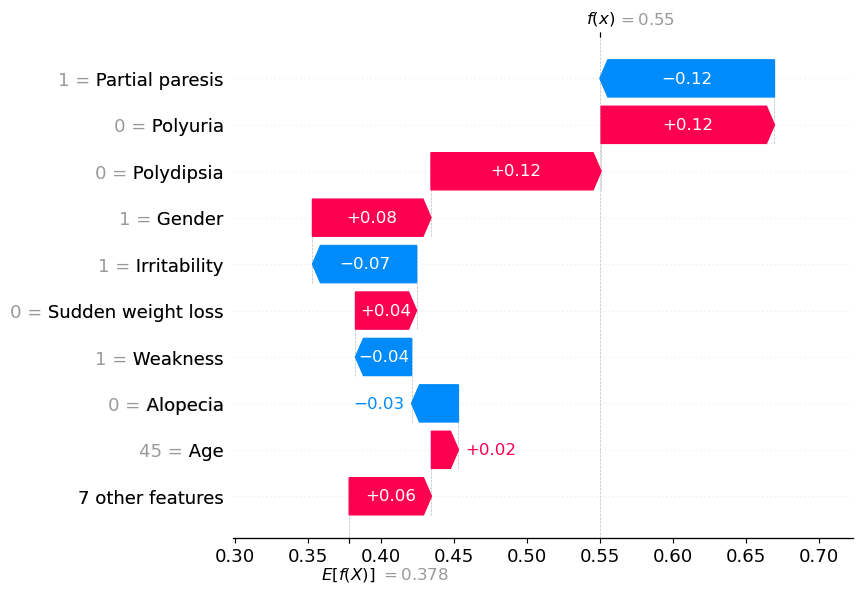

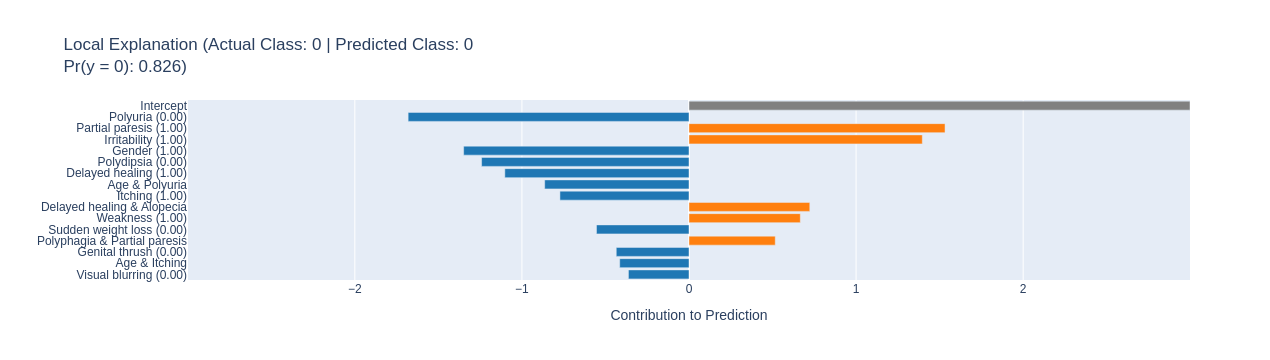

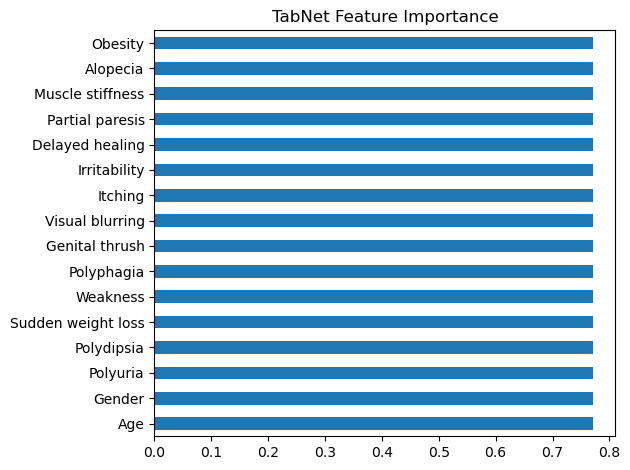

  >> Anchor: Polyuria <= 0.00 AND Polydipsia <= 0.00 AND Gender > 0.00 AND Alopecia <= 0.00 AND Age > 36.00
> Noisy


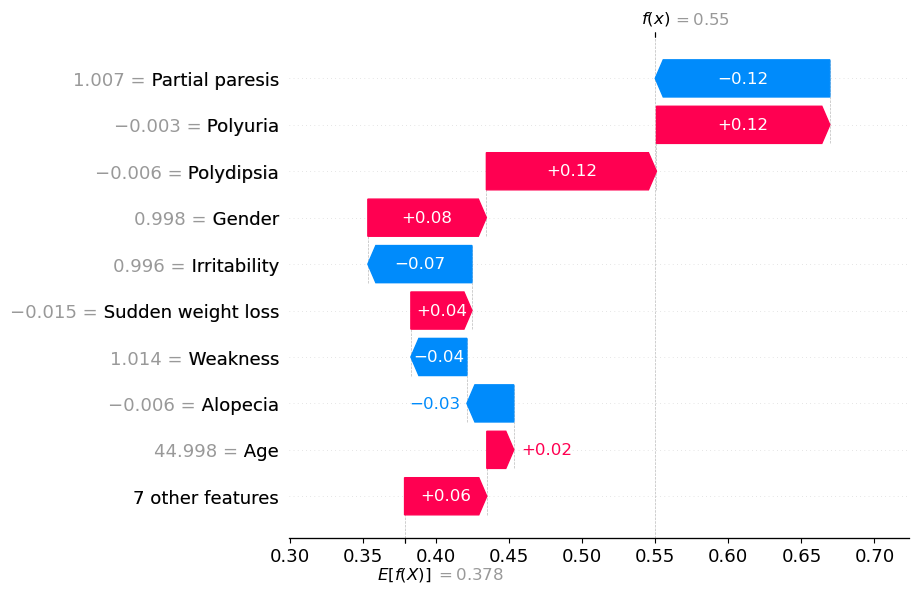

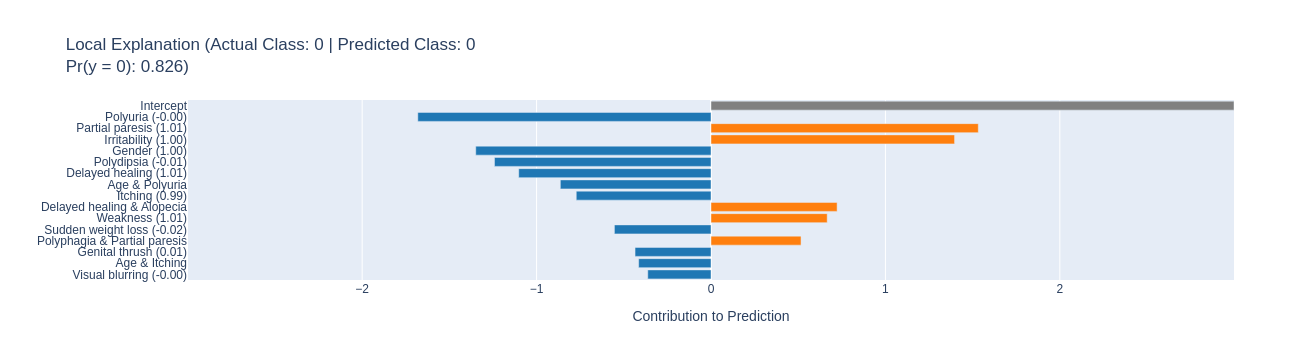

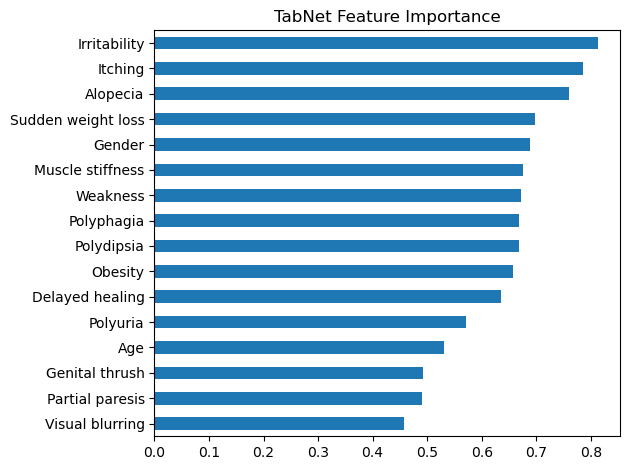

  >> Anchor: Age <= 47.50 AND Polyuria <= 0.00 AND Visual blurring <= 0.00 AND Gender > 0.00 AND Itching > 0.00
ID 8 Prediction:  1
> Original


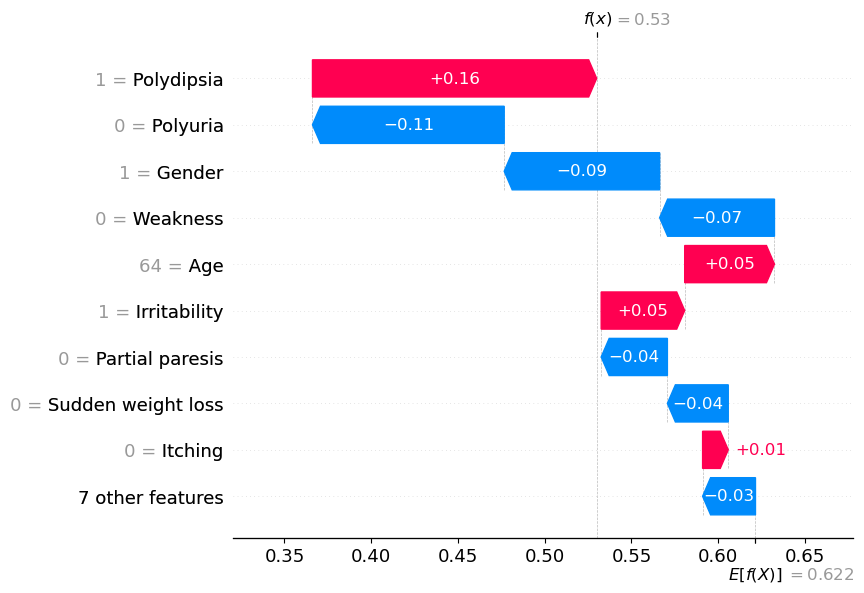

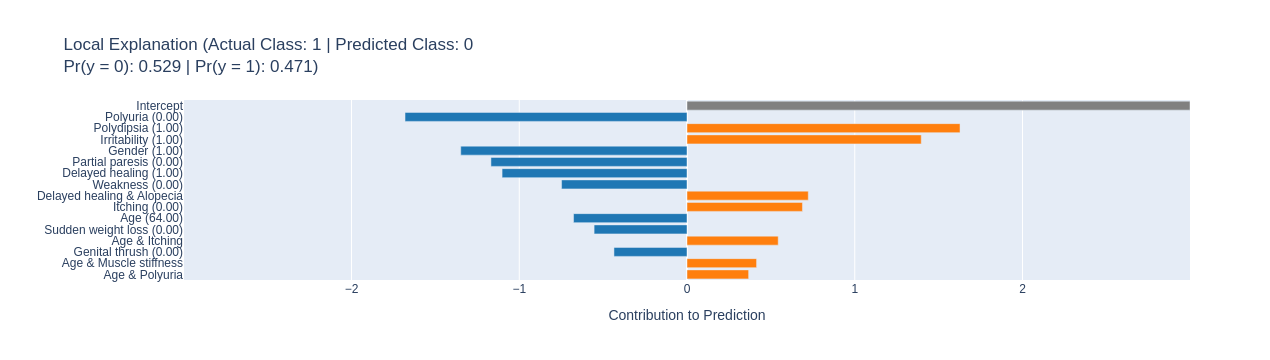

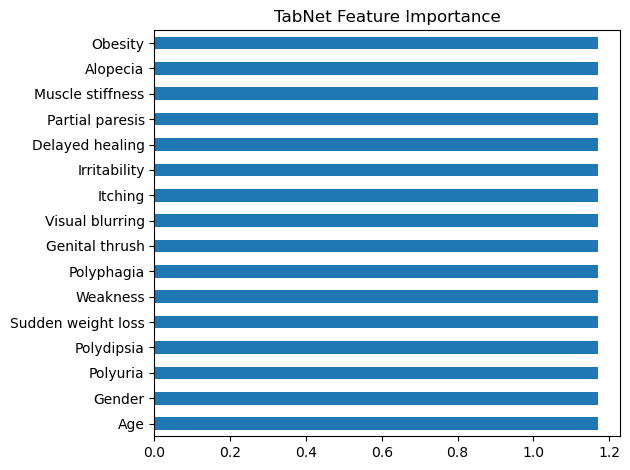

  >> Anchor: Polydipsia > 0.00 AND Irritability > 0.00 AND Obesity <= 0.00 AND Age > 58.00
> Noisy


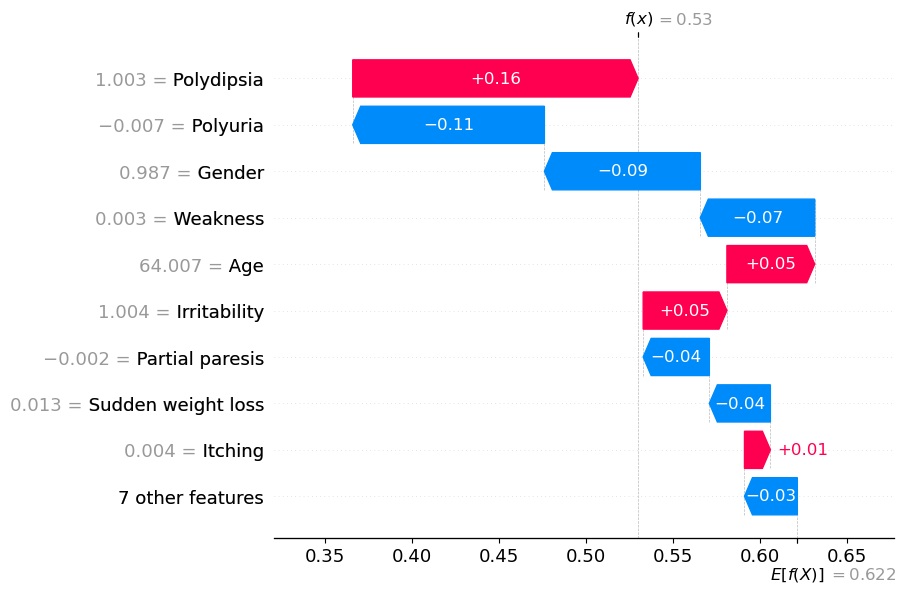

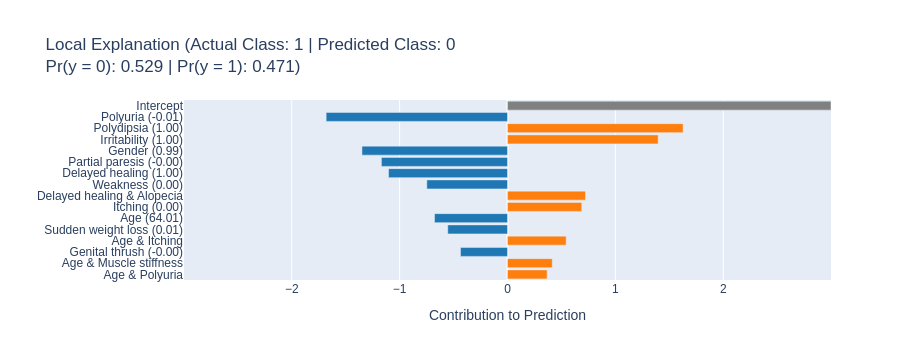

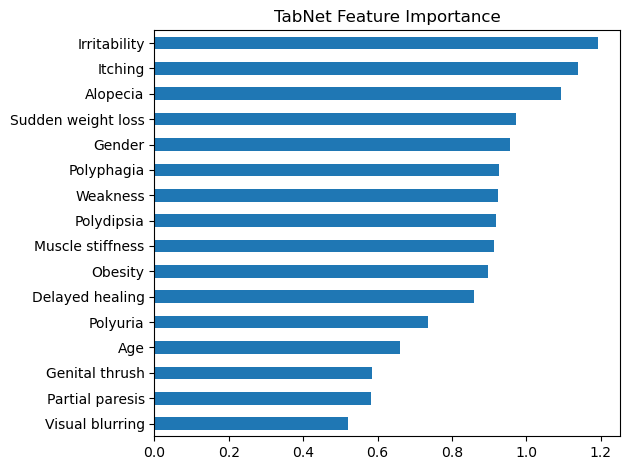

  >> Anchor: Polydipsia > 0.00 AND Weakness > 0.00 AND Muscle stiffness > 0.00


In [22]:
np.random.seed(random_state)
show_data_using_ids(ids_to_explain_list)
for _id in ids_to_explain_list:
    _prediction = y_test.iloc[_id]
    print('ID', _id,  'Prediction: ', _prediction)

    # Original explanation cases
    # Noisy explanation to compare how the rule (features in the rule) changes due to insertion of Noise
    for msg, dataset in [('Original', x_test), ('Noisy', x_test_noisy)]:
        print('>', msg)
        show_outputs(dataset, _id)

## Global

### PMI

Elapsed time to compute the importances: 0.413 seconds


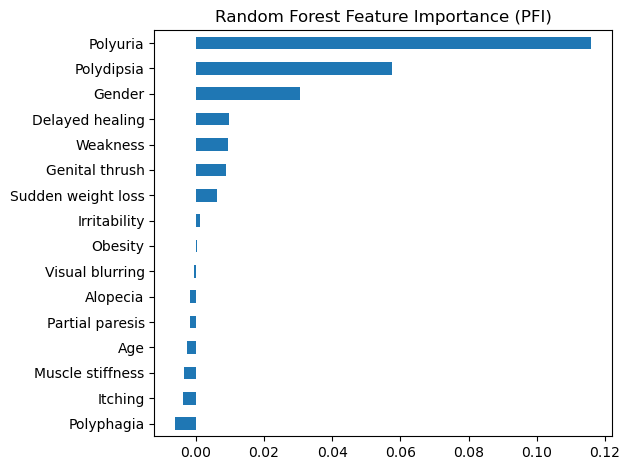

In [23]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    selected_model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

selected_model_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True)

ax = selected_model_importances.plot.barh()
ax.set_title("Random Forest Feature Importance (PFI)")
ax.figure.tight_layout()

### TABNET

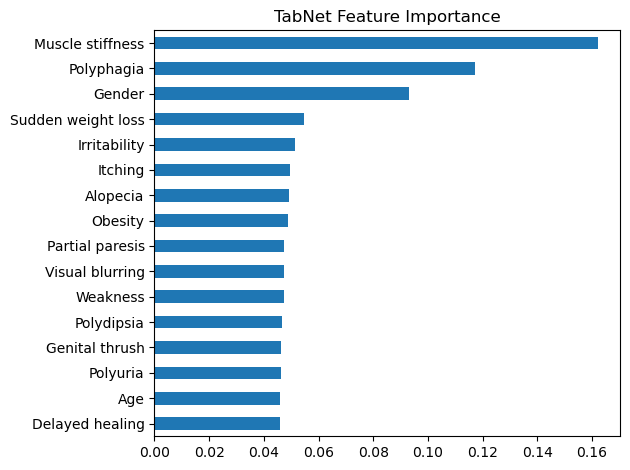

In [24]:
ax = pd.Series(tbn.feature_importances_, index=feature_names).sort_values(ascending=True).plot.barh()
ax.set_title("TabNet Feature Importance")
ax.figure.tight_layout()

### EBM

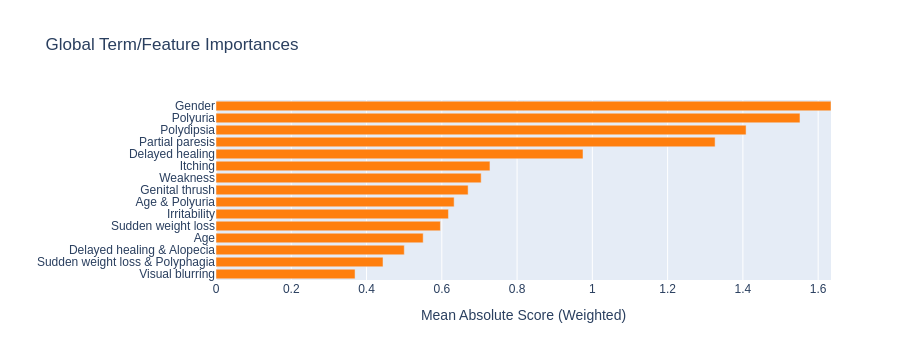

In [25]:
ebm_global = ebm.explain_global()
# show(ebm_global)

# Replace show with the preserve.

# ebm_global = ebm.explain_global(name='EBM')
# show(ebm_global)

# preserve(ebm_global, file_name='output/global-graph.html')
preserve(ebm_global)

### SHAP

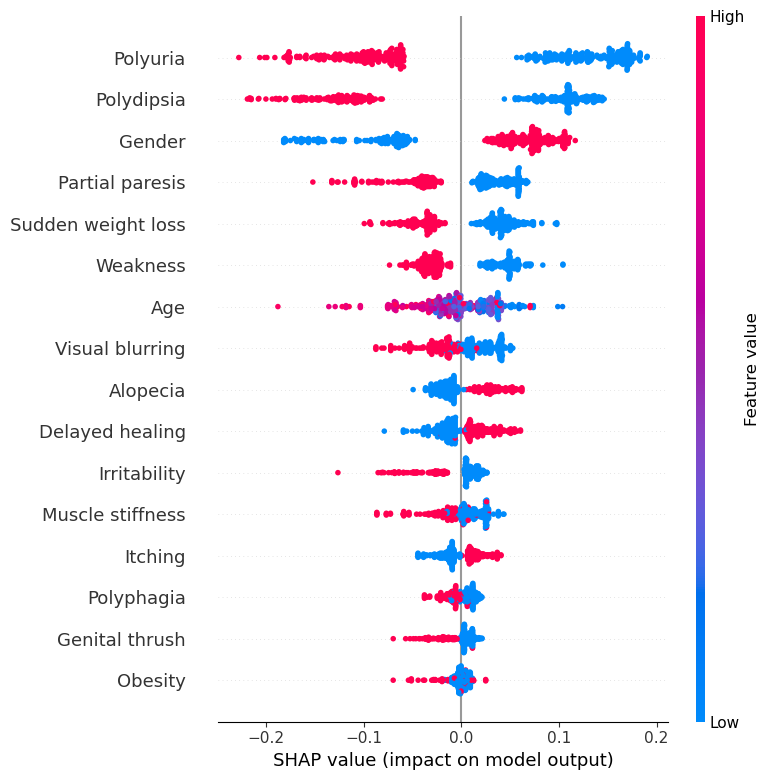

In [26]:
shap_values = exp_shap.shap_values(x_test)
shap.summary_plot(shap_values[:,:,0], x_test)
# shap.summary_plot(shap_values[:,:,0], X_test)

In [27]:
# f.savefig("summary_plot_CS.png", bbox_inches='tight', dpi=600)